# CryptoCurrencies

### Importing required libraries
Here I am going to importing some of the required library, if extra library is required to install It will be install later on.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import re
import string

In [2]:
from sklearn import preprocessing
from sklearn import utils

### Inserting the dataset

In [3]:
ds_coin = pd.read_csv("crypto.csv")

In [4]:
ds_coin.head(100)

,id,name,symbol,slug,num_market_pairs,date_added,max_supply,circulating_supply,total_supply,cmc_rank,...,quote_usd_market_cap,quote_usd_market_cap_dominance,quote_usd_fully_diluted_market_cap,quote_usd_tvl,quote_usd_last_updated,platform_id,platform_name,platform_symbol,platform_slug,platform_token_address
0,1,Bitcoin,BTC,bitcoin,9620,2013-04-28T00:00:00Z,2.100000e+07,1.909138e+07,1.909138e+07,1,...,3.810000e+11,42.8880,4.190000e+11,NaN,2022-07-12T00:20:00Z,NaN,NaN,NaN,NaN,NaN
1,1027,Ethereum,ETH,ethereum,5820,2015-08-07T00:00:00Z,NaN,1.215090e+08,1.215090e+08,2,...,1.330000e+11,14.9917,1.330000e+11,NaN,2022-07-12T00:19:00Z,NaN,NaN,NaN,NaN,NaN
2,825,Tether,USDT,tether,35968,2015-02-25T00:00:00Z,NaN,6.599093e+10,6.815698e+10,3,...,6.594197e+10,7.4160,6.810641e+10,NaN,2022-07-12T00:19:00Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7
3,3408,USD Coin,USDC,usd-coin,4828,2018-10-08T00:00:00Z,NaN,5.554694e+10,5.554694e+10,4,...,5.554312e+10,6.2465,5.554312e+10,NaN,2022-07-12T00:19:00Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48
4,1839,BNB,BNB,bnb,1001,2017-07-25T00:00:00Z,1.651168e+08,1.632770e+08,1.632770e+08,5,...,3.675065e+10,4.1331,3.716475e+10,NaN,2022-07-12T00:19:00Z,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,8677,Symbol,XYM,symbol,38,2021-03-03T00:00:00Z,9.000000e+09,5.582460e+09,7.967989e+09,96,...,2.838272e+08,0.0319,4.575841e+08,NaN,2022-07-12T00:20:00Z,NaN,NaN,NaN,NaN,NaN
96,1684,Qtum,QTUM,qtum,189,2017-05-24T00:00:00Z,1.078224e+08,1.042420e+08,1.039445e+08,97,...,2.810230e+08,0.0316,2.906755e+08,NaN,2022-07-12T00:19:00Z,NaN,NaN,NaN,NaN,NaN
97,3801,BORA,BORA,bora,14,2019-03-18T00:00:00Z,NaN,9.275000e+08,1.205750e+09,98,...,2.802307e+08,0.0315,3.642999e+08,NaN,2022-07-12T00:19:00Z,4256.0,Klaytn,KLAY,klaytn,0x02cbe46fb8a1f579254a9b485788f2d86cad51aa
98,5647,Kadena,KDA,kadena,32,2020-05-31T00:00:00Z,1.000000e+09,1.848024e+08,1.000000e+09,99,...,2.735800e+08,0.0308,1.480392e+09,NaN,2022-07-12T00:19:00Z,NaN,NaN,NaN,NaN,NaN


In [5]:
ds_coin.columns

Index(['id', 'name', 'symbol', 'slug', 'num_market_pairs', 'date_added',
       'max_supply', 'circulating_supply', 'total_supply', 'cmc_rank',
       'last_updated', 'quote_usd_price', 'quote_usd_volume_24h',
       'quote_usd_volume_change_24h', 'quote_usd_percent_change_1h',
       'quote_usd_percent_change_24h', 'quote_usd_percent_change_7d',
       'quote_usd_percent_change_30d', 'quote_usd_percent_change_60d',
       'quote_usd_percent_change_90d', 'quote_usd_market_cap',
       'quote_usd_market_cap_dominance', 'quote_usd_fully_diluted_market_cap',
       'quote_usd_tvl', 'quote_usd_last_updated', 'platform_id',
       'platform_name', 'platform_symbol', 'platform_slug',
       'platform_token_address'],
      dtype='object')

#### Some columns are not required, so I am going to drop the columns.

In [6]:
ds = ds_coin.drop(["id", "name", "symbol", "slug", "num_market_pairs", "date_added", "max_supply", "cmc_rank", 
            "last_updated", "quote_usd_volume_24h", "quote_usd_volume_change_24h", "quote_usd_percent_change_1h", 
            "quote_usd_percent_change_24h", "quote_usd_percent_change_7d", "quote_usd_percent_change_30d", 
            "quote_usd_percent_change_60d", "quote_usd_percent_change_90d", "quote_usd_market_cap_dominance",          
            "quote_usd_fully_diluted_market_cap", "quote_usd_tvl", "quote_usd_last_updated",
            "platform_id", "platform_name", "platform_symbol", "platform_slug", "platform_token_address"], axis = 1)

In [7]:
ds.isnull().sum()

circulating_supply      0
total_supply            0
quote_usd_price         0
quote_usd_market_cap    0
dtype: int64

#### Randomly shuffling the dataframe 

In [8]:
ds = ds.sample(frac = 1)

In [9]:
ds.head(100)

,circulating_supply,total_supply,quote_usd_price,quote_usd_market_cap
36,2.995312e+08,1.000000e+09,4.350852,1.303216e+09
67,1.330089e+09,1.373873e+09,0.393728,5.236930e+08
14,9.539541e+08,9.852395e+08,5.380376,5.132632e+09
91,1.230501e+10,3.770501e+10,0.026203,3.224303e+08
22,4.671000e+08,1.000000e+09,6.070719,2.835632e+09
...,...,...,...,...
1,1.215090e+08,1.215090e+08,1097.069843,1.330000e+11
31,1.036200e+09,1.385626e+09,1.511140,1.565844e+09
12,9.247986e+10,9.247985e+10,0.064679,5.981461e+09
51,1.479989e+07,1.479989e+07,55.128552,8.158967e+08


In [10]:
ds.reset_index(inplace = True)
ds.drop(["index"], axis = 1, inplace = True)

In [11]:
ds.columns

Index(['circulating_supply', 'total_supply', 'quote_usd_price',
       'quote_usd_market_cap'],
      dtype='object')

In [12]:
ds.head(100)

,circulating_supply,total_supply,quote_usd_price,quote_usd_market_cap
0,2.995312e+08,1.000000e+09,4.350852,1.303216e+09
1,1.330089e+09,1.373873e+09,0.393728,5.236930e+08
2,9.539541e+08,9.852395e+08,5.380376,5.132632e+09
3,1.230501e+10,3.770501e+10,0.026203,3.224303e+08
4,4.671000e+08,1.000000e+09,6.070719,2.835632e+09
...,...,...,...,...
95,1.215090e+08,1.215090e+08,1097.069843,1.330000e+11
96,1.036200e+09,1.385626e+09,1.511140,1.565844e+09
97,9.247986e+10,9.247985e+10,0.064679,5.981461e+09
98,1.479989e+07,1.479989e+07,55.128552,8.158967e+08


#### Defining dependent and independent variable as x and y

In [13]:
x = ds["quote_usd_price"]
y = ds["quote_usd_market_cap"]

#### Splitting the dataset into training set and testing set. 

In [14]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

#### Convert text to vectors

In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
# xv_train = fit.transform(x_train)
# xv_test = transform(x_test)

In [16]:
lab = preprocessing.LabelEncoder()
xv_train = pd.DataFrame(lab.fit_transform(x_train), index=x_train.index) 
xv_test = x_test.values.reshape(-1, 1)
# xv_train = pd.DataFrame(lab.fit_transform(x_train), columns=x_train.columns, index=x_train.index)  

### 1. Linear Regression

In [17]:
from sklearn.linear_model import LinearRegression

In [18]:
# xv_train.shape  
# xv_train = xv_train.values.reshape(-1, 1)  
# xv_train = xv_train.transpose()  

In [19]:
LR = LinearRegression()
LR.fit(xv_train.values.reshape(-1, 1), y_train)  

LinearRegression()

In [20]:
pred_lr=LR.predict(xv_test)

In [23]:
pred_lr

array([-8.95026642e+09, -2.08811774e+09,  1.77377470e+10, -7.05312114e+09,
       -6.57257511e+09, -8.54044130e+09, -8.49004185e+09, -9.26183916e+09,
        2.87434522e+10, -9.16916211e+09,  8.93360944e+09, -5.99873596e+09,
       -9.40598927e+09, -8.95041351e+09, -9.28615207e+09, -9.37329879e+09,
       -9.39277115e+09,  4.64812307e+11, -4.57771297e+09, -6.84822005e+09,
       -8.92457348e+09, -9.40704882e+09,  5.12571216e+10, -5.83584775e+09,
       -9.24488169e+09])

In [24]:
LR.score(xv_test, y_test)

-641.1189043418884

#### Visualising the Linear Regression Results

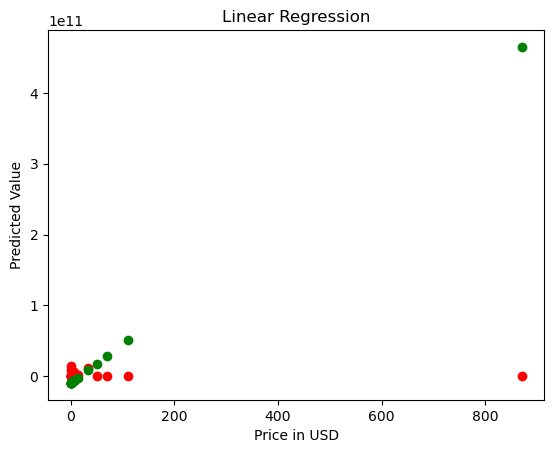

In [25]:
X_grid = np.arange(min(x), max(x), 10)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(xv_test, y_test, color = 'red')
plt.scatter(xv_test, pred_lr, color = 'green')
plt.title('Linear Regression')
plt.xlabel('Price in USD')
plt.ylabel('Predicted Value')
plt.show()

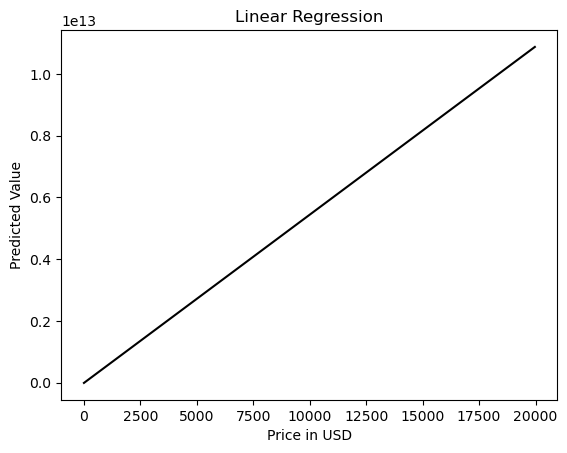

In [26]:
plt.plot(X_grid, LR.predict(X_grid), color = 'black')
plt.title('Linear Regression')
plt.xlabel('Price in USD')
plt.ylabel('Predicted Value')
plt.show()

### 2. Decision Tree Regressor

In [27]:
from sklearn.tree import DecisionTreeRegressor

In [28]:
DT = DecisionTreeRegressor()
DT.fit(xv_train.values.reshape(-1, 1), y_train)

DecisionTreeRegressor()

In [29]:
pred_dt = DT.predict(xv_test)

In [30]:
pred_dt

array([7.34226923e+08, 6.47099363e+08, 4.06582139e+09, 4.80109346e+08,
       3.42705358e+08, 3.72303791e+08, 3.72303791e+08, 5.67635396e+09,
       3.67506491e+10, 5.67635396e+09, 1.75419324e+10, 4.61230834e+08,
       5.67635396e+09, 7.34226923e+08, 5.67635396e+09, 5.67635396e+09,
       5.67635396e+09, 3.81000000e+11, 1.28168518e+09, 3.42705358e+08,
       7.34226923e+08, 5.67635396e+09, 3.81000000e+11, 3.37860130e+08,
       5.67635396e+09])

In [31]:
DT.score(xv_test, y_test)

-843.5718857732685

In [32]:
# print(classification_report(y_test, pred_dt))

#### Visualising the Decision Tree Regression Results

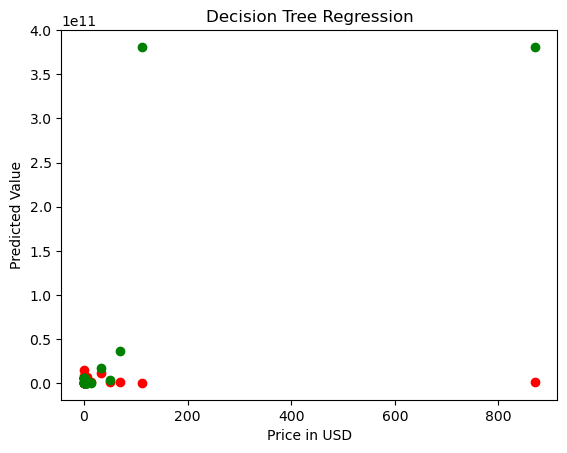

In [33]:
X_grid = np.arange(min(x), max(x), 10)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(xv_test, y_test, color = 'red')
plt.scatter(xv_test, pred_dt, color = 'green')
plt.title('Decision Tree Regression')
plt.xlabel('Price in USD')
plt.ylabel('Predicted Value')
plt.show()

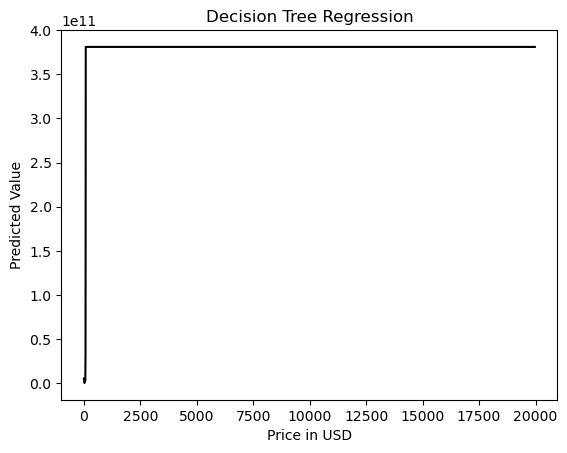

In [34]:
plt.plot(X_grid, DT.predict(X_grid), color = 'black')
plt.title('Decision Tree Regression')
plt.xlabel('Price in USD')
plt.ylabel('Predicted Value')
plt.show()

### 3. Stochastic Gradient Descent (SGD) Regressor

In [35]:
from sklearn.linear_model import SGDRegressor

In [36]:
SGD = SGDRegressor(random_state=0)
SGD.fit(xv_train, y_train)

SGDRegressor(random_state=0)

In [37]:
pred_sgd = SGD.predict(xv_test)

In [38]:
pred_sgd

array([-1.49314405e+10,  4.72900847e+10,  2.27058201e+11,  2.27064568e+09,
        6.62792620e+09, -1.12154114e+10, -1.07584218e+10, -1.77565806e+10,
        3.26850817e+11, -1.69162450e+10,  1.47227977e+11,  1.18311284e+10,
       -1.90636406e+10, -1.49327742e+10, -1.79770343e+10, -1.87672244e+10,
       -1.89437872e+10,  4.28084111e+12,  2.47160457e+10,  4.12855618e+09,
       -1.46984735e+10, -1.90732478e+10,  5.30990207e+11,  1.33080933e+10,
       -1.76028212e+10])

In [39]:
SGD.score(xv_test, y_test)

-54504.50177924367

In [40]:
# print(classification_report(y_test, pred_sgd))

#### Visualising the Stochastic Gradient Descent (SGD) Regression Results

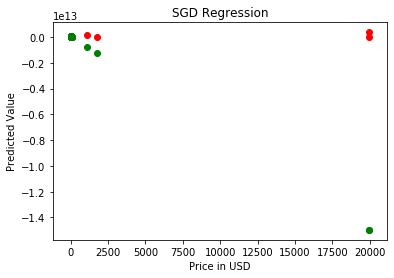

In [39]:
X_grid = np.arange(min(x), max(x), 10)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(xv_test, y_test, color = 'red')
plt.scatter(xv_test, pred_sgd, color = 'green')
plt.title('SGD Regression')
plt.xlabel('Price in USD')
plt.ylabel('Predicted Value')
plt.show()

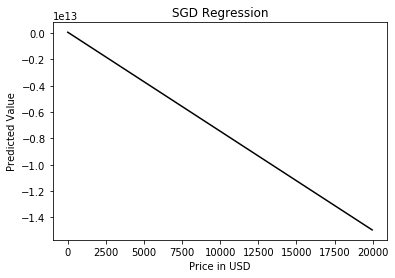

In [40]:
plt.plot(X_grid, SGD.predict(X_grid), color = 'black')
plt.title('SGD Regression')
plt.xlabel('Price in USD')
plt.ylabel('Predicted Value')
plt.show()

### 4. Bayesian Ridge

In [41]:
from sklearn.linear_model import BayesianRidge

In [42]:
BR = BayesianRidge()
BR.fit(xv_train, y_train)

BayesianRidge()

In [43]:
pred_br = BR.predict(xv_test)

In [44]:
pred_br

array([3.83816593e+09, 3.83816593e+09, 3.83816593e+09, 3.83816593e+09,
       3.83816593e+09, 3.83816593e+09, 3.83816593e+09, 3.83816593e+09,
       3.83816593e+09, 3.83816593e+09, 3.83816593e+09, 3.83816593e+09,
       3.83816593e+09, 3.83816593e+09, 3.83816593e+09, 3.83816593e+09,
       3.83816593e+09, 3.83816593e+09, 3.83816593e+09, 3.83816593e+09,
       3.83816593e+09, 3.83816593e+09, 3.83816593e+09, 3.83816593e+09,
       3.83816593e+09])

In [45]:
BR.score(xv_test, y_test)

-0.061614942126431815

In [46]:
# print(classification_report(y_test, pred_br))

#### Visualising the Bayesian Ridge Results

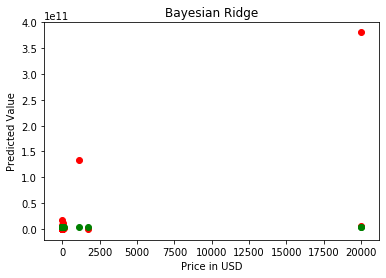

In [47]:
X_grid = np.arange(min(x), max(x), 10)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(xv_test, y_test, color = 'red')
plt.scatter(xv_test, pred_br, color = 'green')
plt.title('Bayesian Ridge')
plt.xlabel('Price in USD')
plt.ylabel('Predicted Value')
plt.show()

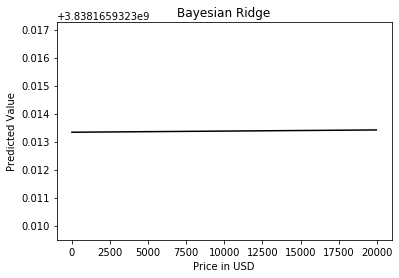

In [48]:
plt.plot(X_grid, BR.predict(X_grid), color = 'black')
plt.title('Bayesian Ridge')
plt.xlabel('Price in USD')
plt.ylabel('Predicted Value')
plt.show()